# Fraud Detection

The goal of this research is to create a classifier that can detect credit card fraud. I'll employ a number of machine learning methods to distinguish between fraudulent and non-fraudulent transactions. 

In [80]:
import numpy as np # For Linear Algebra
import pandas as pd # For I/O, Data Transformation
import os # For Elementary OS operations
import matplotlib.pyplot as plt # For Plotting
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [81]:
# Importation of the dataset
Data = pd.read_csv("/content/creditcard.csv")

In [82]:
Data.shape

(174431, 31)

In [83]:
Data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [84]:
Data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
174426,120193.0,2.032686,-0.070219,-1.093517,0.467291,-0.321890,-1.505390,0.147641,-0.345532,0.724209,0.025619,-0.413590,0.039398,-0.776631,0.642684,0.877336,-0.322105,-0.269921,-0.150632,-0.477133,-0.314874,0.283248,0.955811,0.067464,0.417168,0.157534,-0.121672,-0.017449,-0.055632,1.00,0.0
174427,120193.0,-0.454479,1.201642,0.081936,-0.695024,0.410704,-1.057838,1.041520,-0.210913,0.225049,0.174556,-0.700152,0.576457,0.761757,-0.173587,-0.402984,-0.223091,-0.414847,-0.962945,-0.219391,0.243361,-0.312785,-0.531973,0.083066,-0.005112,-0.375916,0.150884,0.476890,0.223036,13.98,0.0
174428,120194.0,2.094119,-1.713483,-0.778604,-1.611163,-1.361482,-0.085073,-1.331477,0.037524,-1.286570,1.679909,0.699718,-0.189434,0.200714,-0.300222,-0.652953,-0.266468,0.248216,0.479596,-0.022736,-0.269203,-0.048644,0.152273,0.232052,0.681825,-0.346774,-0.233445,0.006162,-0.035610,88.00,0.0
174429,120194.0,-3.644269,-0.747473,-0.267792,-0.807058,-0.947888,2.388635,-2.097686,2.285523,0.114737,-0.018506,-0.607822,0.851503,-0.267037,0.214204,-0.568817,-1.830776,1.043537,1.079362,-0.648447,-1.332992,-0.408052,0.103611,0.656432,-0.966815,-0.365917,-0.226191,-0.090287,-0.423226,53.86,0.0
174430,120194.0,-0.085730,1.014485,-0.708676,-0.798981,0.964767,-0.327944,0.716129,0.186059,0.208413,-0.298447,0.305423,-0.601331,-1.951461,-0.529388,-0.679224,0.725967,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174431 entries, 0 to 174430
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    174431 non-null  float64
 1   V1      174431 non-null  float64
 2   V2      174431 non-null  float64
 3   V3      174431 non-null  float64
 4   V4      174431 non-null  float64
 5   V5      174431 non-null  float64
 6   V6      174431 non-null  float64
 7   V7      174431 non-null  float64
 8   V8      174431 non-null  float64
 9   V9      174431 non-null  float64
 10  V10     174431 non-null  float64
 11  V11     174431 non-null  float64
 12  V12     174431 non-null  float64
 13  V13     174431 non-null  float64
 14  V14     174431 non-null  float64
 15  V15     174431 non-null  float64
 16  V16     174431 non-null  float64
 17  V17     174431 non-null  float64
 18  V18     174430 non-null  float64
 19  V19     174430 non-null  float64
 20  V20     174430 non-null  float64
 21  V21     17

In [86]:
print(Data.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       2
V26       2
V27       3
V28       3
Amount    3
Class     3
dtype: int64


In [87]:
Data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174431.000000,174430.000000,174430.000000,174430.000000,174430.000000,174430.000000,174430.000000,174430.000000,174429.000000,174429.000000,174428.000000,174428.000000,174428.000000,174428.000000
mean,60159.094186,-0.175483,0.043132,0.501285,0.116513,-0.177122,0.059144,-0.078261,0.032520,0.017860,-0.031114,0.193083,-0.089614,0.060359,0.079789,0.137649,-0.009824,0.040119,-0.051995,-0.019007,0.031706,-0.027992,-0.083886,-0.022000,0.009592,0.093479,0.011794,0.002583,0.002428,87.355674,0.002075
std,28102.605640,1.845955,1.609916,1.376857,1.373649,1.338370,1.295346,1.208562,1.230367,1.148970,1.095083,1.046462,1.137164,1.046421,0.974551,0.949714,0.881724,0.909743,0.833570,0.811850,0.726422,0.745954,0.666581,0.692843,0.598453,0.474925,0.491425,0.391985,0.306803,246.541099,0.045509
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.049895,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-22.838548,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,40761.500000,-0.988361,-0.535804,-0.053774,-0.746397,-0.828368,-0.691418,-0.583759,-0.162592,-0.658858,-0.520772,-0.564692,-0.500055,-0.629630,-0.336601,-0.444243,-0.473486,-0.419507,-0.523768,-0.497271,-0.182758,-0.230099,-0.545730,-0.171196,-0.331635,-0.193571,-0.330890,-0.064640,-0.026056,5.380000,0.000000
50%,59753.000000,-0.197599,0.113957,0.629567,0.125183,-0.226730,-0.201684,-0.030164,0.057049,-0.078475,-0.112392,0.118610,0.115368,0.028749,0.091783,0.249647,0.061387,-0.020138,-0.052640,-0.022117,-0.035399,-0.054063,-0.066417,-0.036913,0.060222,0.136271,-0.059602,0.009139,0.021220,21.620000,0.000000
75%,78126.000000,1.182116,0.805355,1.299825,0.940870,0.371355,0.450742,0.465395,0.351342,0.640756,0.406170,1.001042,0.621007,0.737493,0.523806,0.832996,0.526702,0.433288,0.429564,0.467857,0.156089,0.127394,0.362349,0.097860,0.415871,0.399363,0.273043,0.090716,0.078345,76.600000,0.000000
max,120194.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,155.150000,4.022866,41.710000,3.517346,12.152401,33.847808,19656.530000,1.000000


In [88]:
Data.duplicated().sum()

4606

In [89]:
Data.drop_duplicates(inplace=True)

In [90]:
Data['Class'].value_counts()

0.0    169480
1.0       342
Name: Class, dtype: int64

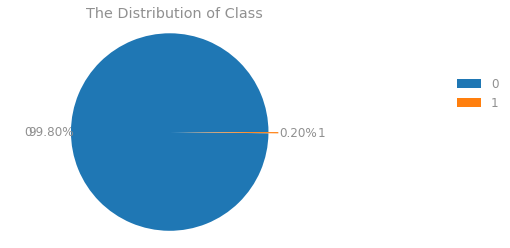

In [91]:
fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
labels = ['0', 
         '1']
explode=(0.1,0)
ax.pie(Data['Class'].value_counts(), explode=explode,labels=labels, autopct='%1.2f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)



ax.axis('equal')
ax.set_title("The Distribution of Class")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

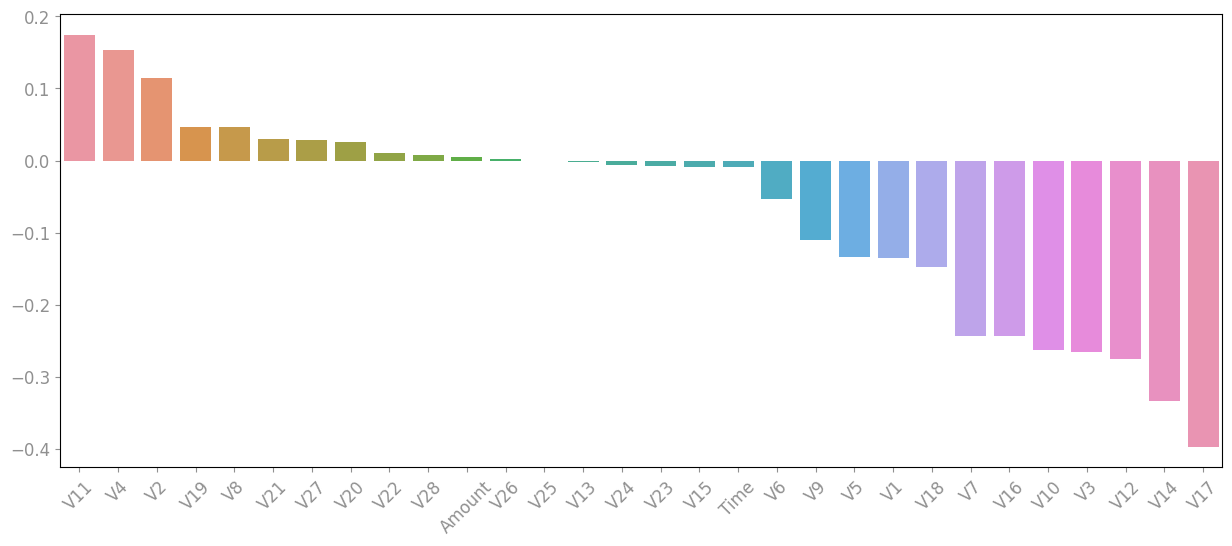

In [92]:
plt.figure(figsize = (15,6),dpi = 100)
sns.barplot(x = Data.corr()["Class"].drop(index="Class").sort_values(ascending=False).index,
            y = Data.corr()["Class"].drop(index="Class").sort_values(ascending=False).values)
plt.xticks(rotation = 45);

In [93]:
#Data[(Data["V17"] < 0.4 ) & (Data["Class"] == 1)]

In [94]:
Data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174426,120193.0,2.032686,-0.070219,-1.093517,0.467291,-0.321890,-1.505390,0.147641,-0.345532,0.724209,0.025619,-0.413590,0.039398,-0.776631,0.642684,0.877336,-0.322105,-0.269921,-0.150632,-0.477133,-0.314874,0.283248,0.955811,0.067464,0.417168,0.157534,-0.121672,-0.017449,-0.055632,1.00,0.0
174427,120193.0,-0.454479,1.201642,0.081936,-0.695024,0.410704,-1.057838,1.041520,-0.210913,0.225049,0.174556,-0.700152,0.576457,0.761757,-0.173587,-0.402984,-0.223091,-0.414847,-0.962945,-0.219391,0.243361,-0.312785,-0.531973,0.083066,-0.005112,-0.375916,0.150884,0.476890,0.223036,13.98,0.0
174428,120194.0,2.094119,-1.713483,-0.778604,-1.611163,-1.361482,-0.085073,-1.331477,0.037524,-1.286570,1.679909,0.699718,-0.189434,0.200714,-0.300222,-0.652953,-0.266468,0.248216,0.479596,-0.022736,-0.269203,-0.048644,0.152273,0.232052,0.681825,-0.346774,-0.233445,0.006162,-0.035610,88.00,0.0
174429,120194.0,-3.644269,-0.747473,-0.267792,-0.807058,-0.947888,2.388635,-2.097686,2.285523,0.114737,-0.018506,-0.607822,0.851503,-0.267037,0.214204,-0.568817,-1.830776,1.043537,1.079362,-0.648447,-1.332992,-0.408052,0.103611,0.656432,-0.966815,-0.365917,-0.226191,-0.090287,-0.423226,53.86,0.0


In [98]:
new_df = Data.dropna()
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174425,120193.0,1.666498,-2.039068,-0.493518,-0.688303,-1.241777,0.911522,-1.275609,0.288892,0.609940,0.562795,-0.155373,0.337824,0.165324,-0.903192,-1.743342,1.217235,0.069592,-0.759155,1.396211,0.478418,0.153262,0.123498,0.026313,0.119734,-0.378033,-0.339585,-0.004457,-0.007554,243.50,0.0
174426,120193.0,2.032686,-0.070219,-1.093517,0.467291,-0.321890,-1.505390,0.147641,-0.345532,0.724209,0.025619,-0.413590,0.039398,-0.776631,0.642684,0.877336,-0.322105,-0.269921,-0.150632,-0.477133,-0.314874,0.283248,0.955811,0.067464,0.417168,0.157534,-0.121672,-0.017449,-0.055632,1.00,0.0
174427,120193.0,-0.454479,1.201642,0.081936,-0.695024,0.410704,-1.057838,1.041520,-0.210913,0.225049,0.174556,-0.700152,0.576457,0.761757,-0.173587,-0.402984,-0.223091,-0.414847,-0.962945,-0.219391,0.243361,-0.312785,-0.531973,0.083066,-0.005112,-0.375916,0.150884,0.476890,0.223036,13.98,0.0
174428,120194.0,2.094119,-1.713483,-0.778604,-1.611163,-1.361482,-0.085073,-1.331477,0.037524,-1.286570,1.679909,0.699718,-0.189434,0.200714,-0.300222,-0.652953,-0.266468,0.248216,0.479596,-0.022736,-0.269203,-0.048644,0.152273,0.232052,0.681825,-0.346774,-0.233445,0.006162,-0.035610,88.00,0.0


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, f1_score
import warnings
warnings.filterwarnings('ignore') 

X = new_df.drop(['Class'],axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [100]:

models = []
models.append(("XGB",XGBClassifier(random_state = 42)))
#models.append(("LightGBM", LGBMClassifier(random_state = 42)))
models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []



for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score train" : f1_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score train
0,RF,0.999431,0.999992,0.803922,0.995833,0.849741,0.997912
1,XGB,0.999333,0.999689,0.813725,0.862500,0.830000,0.917960
2,ADA,0.999313,0.999420,0.764706,0.787500,0.816754,0.845638
3,GBC,0.999117,0.999377,0.705882,0.725000,0.761905,0.824645
4,SVM,0.999195,0.999638,0.627451,0.841667,0.757396,0.903803
5,LR,0.998901,0.998915,0.568627,0.591667,0.674419,0.687651
